# VEHICLE ANALYSIS FOR PURCHASE BY A CAR HIRE COMPANY

# Introduction

As a car hire company, understanding the factors influencing fuel efficiency, maintenance costs, and customer preferences is critical to selecting the right mix of vehicles. This project aims to analyze car makes and models using SQL for data extraction and linear regression to identify trends in fuel consumption, engine performance, and other key metrics. By leveraging historical data on vehicle specifications and performance, we can predict which car models align best with our business needs, ensuring a balance between operational costs and customer satisfaction.

## Problem Statement

In the car hire industry, selecting the right vehicles for a fleet is crucial to balancing customer satisfaction and operational efficiency. Car hire companies must choose vehicles that not only meet customer expectations in terms of reliability and comfort but also minimize costs related to fuel, maintenance, and depreciation. With numerous car makes and models available, each with unique specifications and performance metrics, making data-driven decisions becomes essential to avoid costly mistakes in fleet investments.

As a data scientist I have been tasked to analyze historical data on various car makes and models to determine the most fuel effective vehicle make and models with the least carbon emmisions. By examining these factors we aim to create a model that predicts the best car choices. 

## Objectives

#### Data Extraction and Cleaning: 
Use SQL to extract and clean the dataset, ensuring it is suitable for analysis by removing any inconsistencies, handling missing values, and organizing data to facilitate a smooth analysis.

#### Exploratory Data Analysis (EDA): 
Analyze the dataset to understand key variables, distributions, and trends, and seek to identify relationships and outliers that may impact our final model.

#### Business Objective: 
Identify and recommend to our client from each vehicle class, (3-5) makes that give the best fuel efficiency and have the lowest CO2 emissions.

a. Investigate how different car makes perform in terms of fuel efficiency and CO2 emmissions
b. Investigate how Engine Size affects fuel efficiency and CO2 emissions
c. Investigate how Transmission Type affects fuel efficiency
d. Investigate how Fuel Type affects CO2 emissions


#### Statistical Tests

Trend Analysis
a. Trend analysis to identify average fuel consumption for the top 3 makes in each vehicle class over time
b. Trend analysis to identify average emissions for the top 3 makes in each vehicle class over time

#### Regression Analysis
a. Effect of engine size on fuel efficiency
b. Effect of fuel consumption as measured by 'Comb (L/100 KM) and emissions
c. Effect of Transmission type on fuel efficiency
d. Effect of fuel type on emissions

#### Hypothesis Testing
a. Test whether the relationships obtaing by our regression models above are statistically significant


#### Summarize our findings and give conclusions
Give recomendations to our client on the right mix of car makes to consider for their business, that will give them the best fuel economy and low CO2 emissions.
Provide them with a summary of the various factors (car attributes) that have statistically significant impact on fuel efficiency and CO2 emissions.

## Data Understanding

In [2]:
#Import necessary liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
#Load the Vehicles data Fuel_Consumption_2000_2022.csv as vehicles_df
# in order to handle the large data set more efficiently the low memory has been set to False
vehicles_df = pd.read_csv("Fuel_Consumption_2000_2022.csv", index_col=0, low_memory=False, encoding='ISO-8859-1')


In [5]:
#Checking the structure of the data
print('The shape of the DataFrame:' , vehicles_df.shape)
num_rows, num_columns= vehicles_df.shape
print('The number of rows:', num_rows)
print('The number of columns:', num_columns)

The shape of the DataFrame: (22556, 12)
The number of rows: 22556
The number of columns: 12


In [6]:
# Previewing the top of the dataset
vehicles_df.head()

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
YEAR,,,,,,,,,,,,
2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [7]:
#Examine the structure of the data to check if:
    # the data types are correct based on what the expected data in the fields need to display
    # the non-null count column helps to identify columns that have missing values
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22556 entries, 2000 to 2022
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MAKE              22556 non-null  object 
 1   MODEL             22556 non-null  object 
 2   VEHICLE CLASS     22556 non-null  object 
 3   ENGINE SIZE       22556 non-null  float64
 4   CYLINDERS         22556 non-null  int64  
 5   TRANSMISSION      22556 non-null  object 
 6   FUEL              22556 non-null  object 
 7   FUEL CONSUMPTION  22556 non-null  float64
 8   HWY (L/100 km)    22556 non-null  float64
 9   COMB (L/100 km)   22556 non-null  float64
 10  COMB (mpg)        22556 non-null  int64  
 11  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 2.2+ MB


The Data types are in line with what we expect. No columns have missing values


In [8]:
# checking for any missing values
vehicles_df.isna().sum()

MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

In [10]:
vehicles_df.columns

Index(['MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
      dtype='object')

In [9]:
# Count the number of duplicated rows
num_duplicates = vehicles_df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 4975


In [24]:
# Drop duplicated rows and keep the first occurrence
duplicate_df = vehicles_df.drop_duplicates()

# Verify if duplicates have been removed
print("Number of duplicated rows after removal:", vehicles_df.duplicated().sum())

Number of duplicated rows after removal: 4975


C:\Users\Wilbroda\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Wilbroda\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Wilbroda\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Wilbroda\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

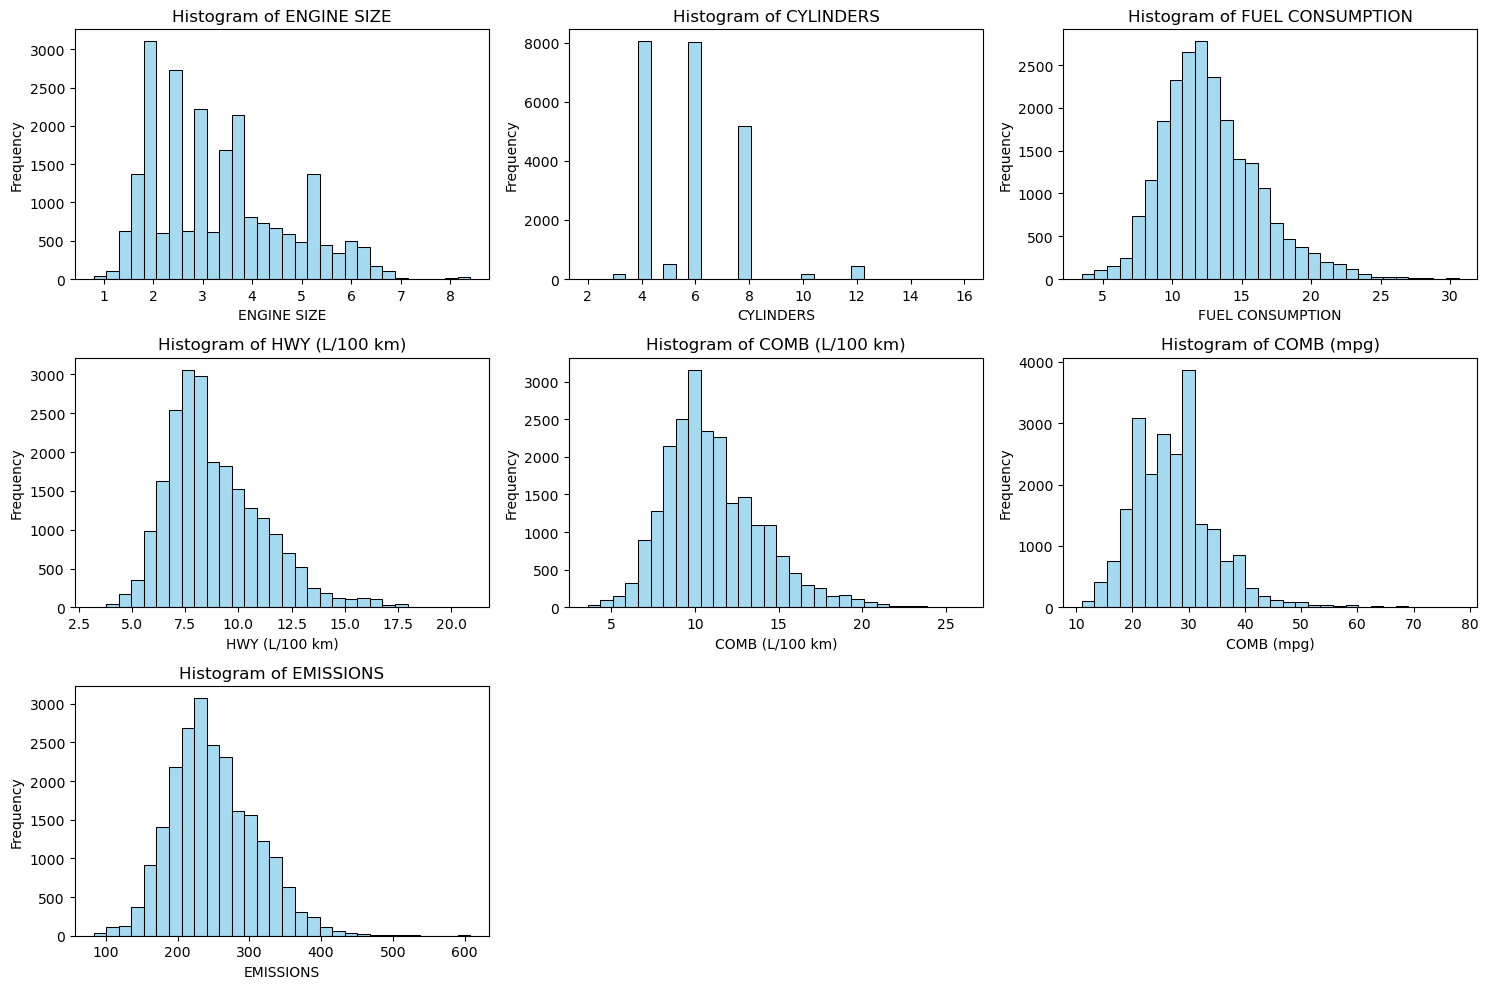

In [25]:
# Replace infinite values with NaN in the DataFrame
vehicles_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plot histograms for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust (3, 3) based on the number of numerical columns
    sns.histplot(vehicles_df[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



# Explortory Data Analysis

## Univariate Analysis for numerical columns

In [26]:
#Understanding the data set
vehicles_df.describe()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


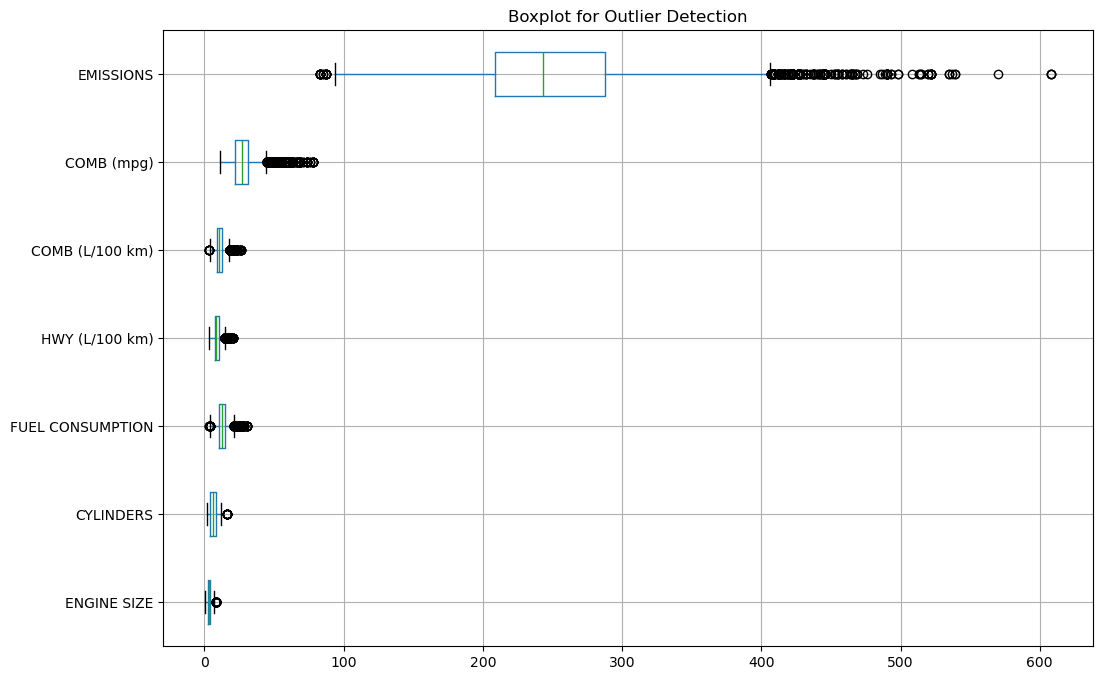

In [27]:
# Checking for outliers in the numerical columns
# Box plots will be used to visualize outliers
# Plot a boxplot for each numerical column
vehicles_df.boxplot(figsize=(12, 8), vert=False)
plt.title("Boxplot for Outlier Detection")
plt.show()

Outliers: 

There are substantial outliers, especially in EMISSIONS, HWY (L/100 km), COMB (L/100 km), and COMB (mpg). These outliers represent vehicles with either very high or low values for emissions, fuel efficiency, and fuel consumption.

Skewed Distributions: 

For variables like EMISSIONS and COMB (mpg), the distributions are skewed, indicating that the dataset contains vehicles with extreme performance characteristics (either very eco-friendly or not at all).
This boxplot analysis suggests that the dataset contains a diverse range of vehicle types, from highly fuel-efficient, low-emission cars to less efficient, high-emission models. For the car hire company, I recommend a focus on vehicles within the main distribution ranges (non-outliers) for a more consistent and reliable fleet, while carefully considering any outliers that align with specific customer needs (e.g., eco-friendly vehicles or high-performance models).

In [28]:
# Checking for outliers using Z-scores
# Calculate z-scores for numerical columns

from scipy.stats import zscore

z_scores = vehicles_df.select_dtypes(include='number').apply(zscore)

# Flag rows with a z-score > 3 or < -3 as outliers
outliers = (z_scores.abs() > 3)
outliers_count = outliers.sum()
print("Outliers count per column using Z-scores:")
print(outliers_count)

Outliers count per column using Z-scores:
ENGINE SIZE          41
CYLINDERS           463
FUEL CONSUMPTION    177
HWY (L/100 km)      292
COMB (L/100 km)     219
COMB (mpg)          275
EMISSIONS           105
dtype: int64


These outliers show considerable variability in your dataset across engine size, fuel consumption, and emissions. This diversity suggests that your fleet options range widely in efficiency and environmental impact. For a car hire company, understanding these extremes could be useful to cater to different customer needs (e.g., offering both eco-friendly and high-performance options) and to balance operational costs through informed fleet selection

In [35]:
# Define a variable for numerical columns
numerical_columns = vehicles_df.select_dtypes(include='number').columns

# Calculate IQR bounds for each numerical column
iqr_bounds = {}

for column in numerical_columns:
    Q1 = vehicles_df[column].quantile(0.25)
    Q3 = vehicles_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_bounds[column] = {'Lower Bound': lower_bound, 'Upper Bound': upper_bound}

# Display the IQR bounds for each column
for column, bounds in iqr_bounds.items():
    print(f"{column} - Lower Bound: {bounds['Lower Bound']}, Upper Bound: {bounds['Upper Bound']}")

ENGINE SIZE - Lower Bound: -0.5500000000000007, Upper Bound: 7.050000000000001
CYLINDERS - Lower Bound: -2.0, Upper Bound: 14.0
FUEL CONSUMPTION - Lower Bound: 3.9125000000000014, Upper Bound: 21.2125
HWY (L/100 km) - Lower Bound: 2.95, Upper Bound: 14.549999999999999
COMB (L/100 km) - Lower Bound: 3.7, Upper Bound: 18.099999999999998
COMB (mpg) - Lower Bound: 8.5, Upper Bound: 44.5
EMISSIONS - Lower Bound: 90.5, Upper Bound: 406.5


In [17]:
#Removing outliers

# Remove outliers based on IQR for each numerical column
for column in numerical_columns:
    Q1 = vehicles_df[column].quantile(0.25)
    Q3 = vehicles_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out rows where the values are outside the IQR bounds
    vehicles_df1 = vehicles_df[(vehicles_df[column] >= lower_bound) & (vehicles_df[column] <= upper_bound)]

# Display the DataFrame after removing outliers
print("DataFrame after removing outliers:")
print(vehicles_df1)


DataFrame after removing outliers:
       MAKE        MODEL  VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION  \
YEAR                                                                           
2000  ACURA        1.6EL        COMPACT          1.6          4           A4   
2000  ACURA        1.6EL        COMPACT          1.6          4           M5   
2000  ACURA        3.2TL       MID-SIZE          3.2          6          AS5   
2000  ACURA        3.5RL       MID-SIZE          3.5          6           A4   
2000  ACURA      INTEGRA     SUBCOMPACT          1.8          4           A4   
...     ...          ...            ...          ...        ...          ...   
2022  Volvo  XC40 T5 AWD     SUV: Small          2.0          4          AS8   
2022  Volvo  XC60 B5 AWD     SUV: Small          2.0          4          AS8   
2022  Volvo  XC60 B6 AWD     SUV: Small          2.0          4          AS8   
2022  Volvo  XC90 T5 AWD  SUV: Standard          2.0          4          AS8   
2022 

In [18]:
vehicles_df1.describe()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000,22338.000000
mean,3.333499,5.816949,12.674071,8.869657,10.962969,27.455323,248.406303
std,1.311820,1.766340,3.352111,2.205339,2.798096,7.194090,56.301643
min,0.800000,2.000000,4.000000,3.800000,4.000000,12.000000,94.000000
25%,2.300000,4.000000,10.400000,7.300000,9.025000,22.000000,209.000000
50%,3.000000,6.000000,12.200000,8.400000,10.500000,27.000000,242.000000
75%,4.200000,8.000000,14.700000,10.200000,12.700000,31.000000,286.000000
max,8.400000,12.000000,27.900000,19.600000,23.300000,71.000000,406.000000


In [20]:
vehicles_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22338 entries, 2000 to 2022
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MAKE              22338 non-null  object 
 1   MODEL             22338 non-null  object 
 2   VEHICLE CLASS     22338 non-null  object 
 3   ENGINE SIZE       22338 non-null  float64
 4   CYLINDERS         22338 non-null  int64  
 5   TRANSMISSION      22338 non-null  object 
 6   FUEL              22338 non-null  object 
 7   FUEL CONSUMPTION  22338 non-null  float64
 8   HWY (L/100 km)    22338 non-null  float64
 9   COMB (L/100 km)   22338 non-null  float64
 10  COMB (mpg)        22338 non-null  int64  
 11  EMISSIONS         22338 non-null  int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 2.2+ MB


# Statistical Analysis

#### Univariate Analysis for the Categorical Columns

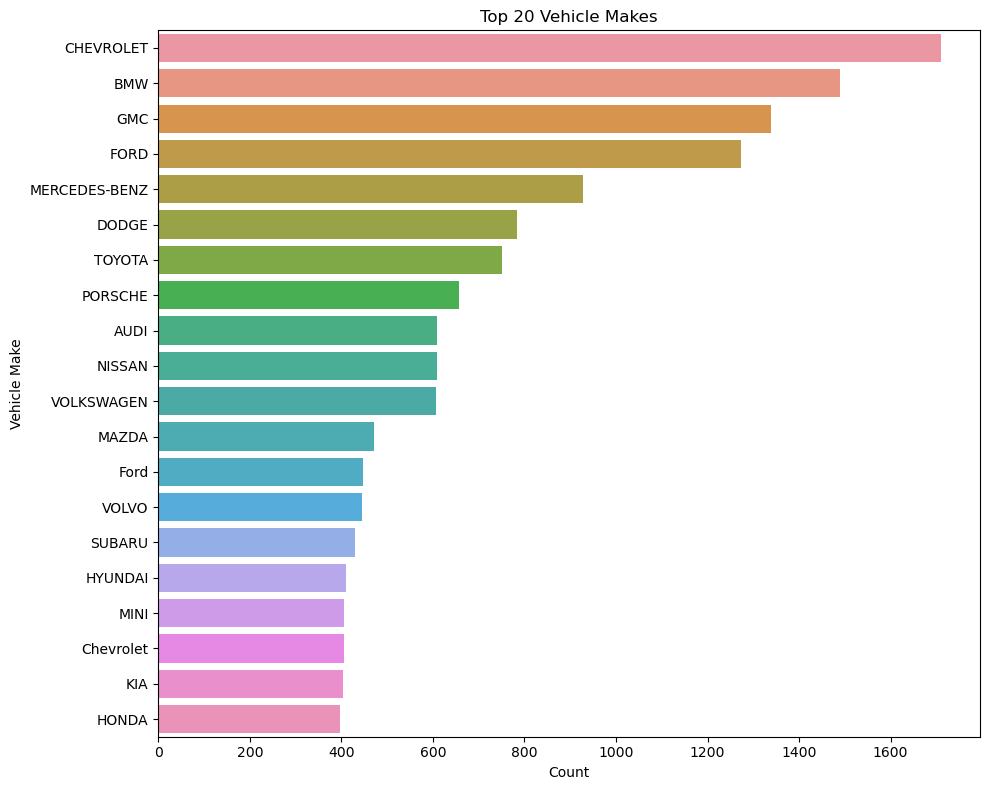

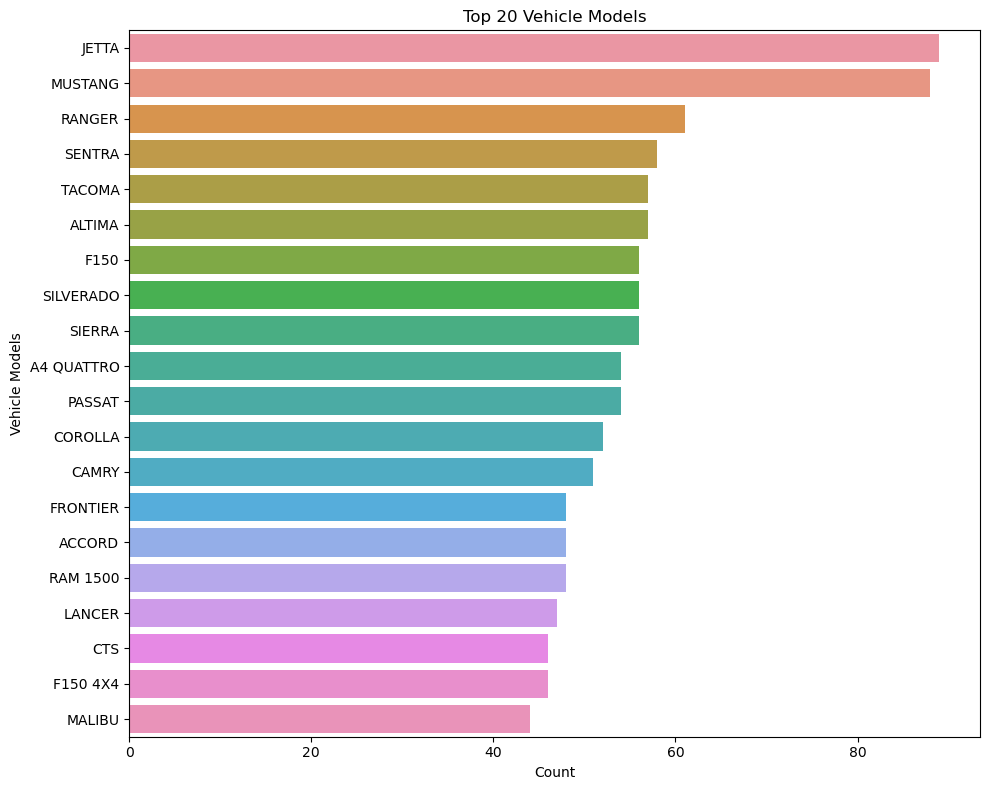

In [36]:
# Top Cars
# Top 10 Car Makes
top_n = 20

top_makes = vehicles_df1['MAKE'].value_counts().head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(y=top_makes.index, x=top_makes.values)
plt.title(f'Top {top_n} Vehicle Makes')
plt.xlabel('Count')
plt.ylabel('Vehicle Make')
plt.tight_layout()
plt.show()

# Top Car Models
top_n = 20

top_models = vehicles_df1['MODEL'].value_counts().head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(y=top_models.index, x=top_models.values)
plt.title(f'Top {top_n} Vehicle Models')
plt.xlabel('Count')
plt.ylabel('Vehicle Models')
plt.tight_layout()
plt.show()

C:\Users\Wilbroda\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Wilbroda\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Wilbroda\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


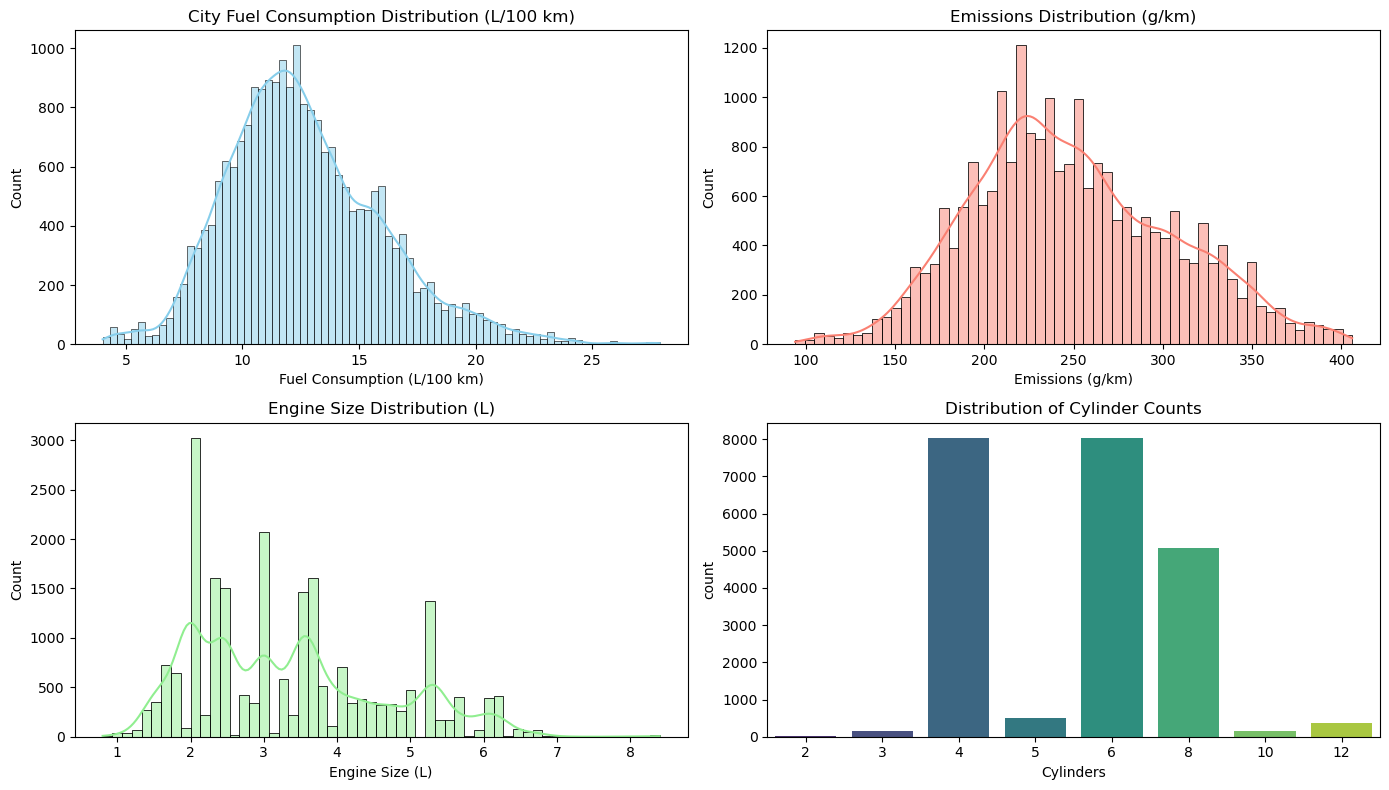

In [33]:
# 2. Distribution Plots
plt.figure(figsize=(14, 8))

# Fuel consumption in the city
plt.subplot(2, 2, 1)
sns.histplot(vehicles_df1['FUEL CONSUMPTION'], kde=True, color='skyblue')
plt.title('City Fuel Consumption Distribution (L/100 km)')
plt.xlabel('Fuel Consumption (L/100 km)')

# Emissions
plt.subplot(2, 2, 2)
sns.histplot(vehicles_df1['EMISSIONS'], kde=True, color='salmon')
plt.title('Emissions Distribution (g/km)')
plt.xlabel('Emissions (g/km)')

# Engine Size
plt.subplot(2, 2, 3)
sns.histplot(vehicles_df1['ENGINE SIZE'], kde=True, color='lightgreen')
plt.title('Engine Size Distribution (L)')
plt.xlabel('Engine Size (L)')

# Number of Cylinders
plt.subplot(2, 2, 4)
sns.countplot(x=vehicles_df1['CYLINDERS'], palette='viridis')
plt.title('Distribution of Cylinder Counts')
plt.xlabel('Cylinders')

plt.tight_layout()
plt.show()

## Bivariate analysis

I will analyze two variables simultaneously to understand the relationship between them

### Correlation Analysis

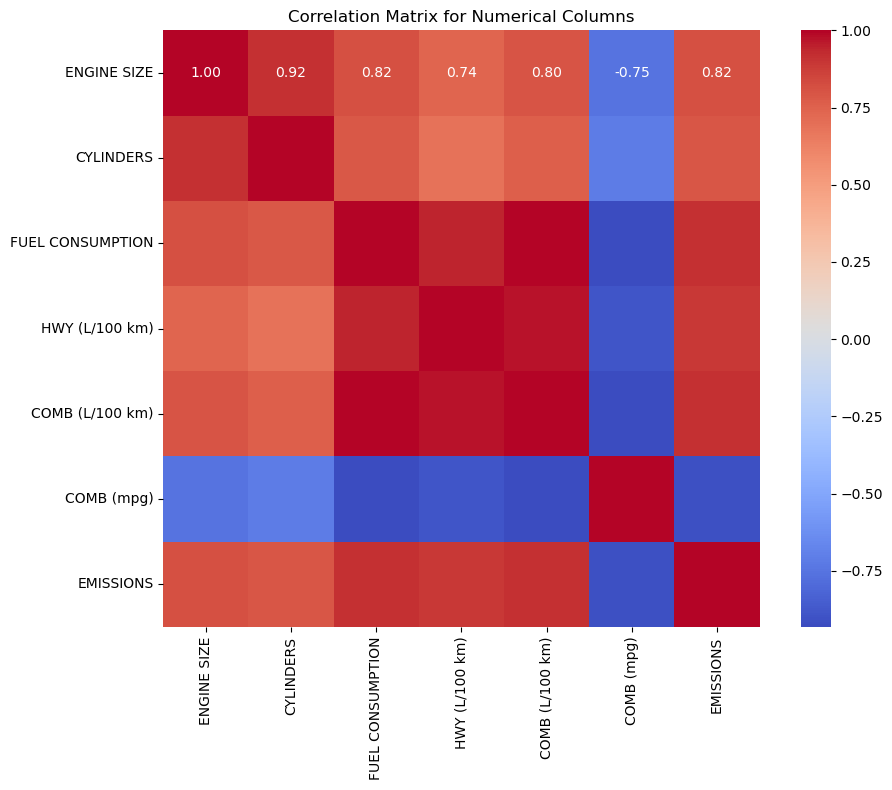

In [43]:
# Define a variable for numerical columns
numerical_columns = vehicles_df1.select_dtypes(include='number').columns

# Calculate the correlation matrix
correlation_matrix = vehicles_df1[numerical_columns].corr()

# Display the correlation matrix as a heatmap with values
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix for Numerical Columns')
plt.tight_layout()
plt.show()

Positive Correlations:
Fuel consumption, emissions, and engine size have high positive correlations, indicating that vehicles with larger engines and more cylinders typically consume more fuel and produce higher emissions.

Negative Correlations:
Combined MPG (miles per gallon) shows a strong negative correlation with fuel consumption and emissions, as expected. Higher MPG indicates better fuel efficiency, leading to lower emissions.

### EMISSIONS vs.MAKE AND MODEL
Objective is to determine for each class the top 3 make and model has the highest emissions

In [50]:
# Group by VEHICLE CLASS, MAKE, and MODEL, then calculate the mean emissions
emissions_by_class_make_model = vehicles_df1.groupby(['VEHICLE CLASS', 'MAKE', 'MODEL'])['EMISSIONS'].mean().reset_index()

# Sort by emissions within each vehicle class and select the top 3 emitters per class
top_emitters_per_class = emissions_by_class_make_model.sort_values(['VEHICLE CLASS', 'EMISSIONS'], ascending=[True, False]) \
                                                      .groupby('VEHICLE CLASS').head(3)

# Display the result
print("Top 3 Car Make and Model with Highest Emissions by Vehicle Class:")
print(top_emitters_per_class)

Top 3 Car Make and Model with Highest Emissions by Vehicle Class:
        VEHICLE CLASS         MAKE                   MODEL   EMISSIONS
328           COMPACT  ROLLS-ROYCE                    DAWN  390.000000
19            COMPACT      BENTLEY         CONTINENTAL GTC  387.000000
329           COMPACT  ROLLS-ROYCE           PHANTOM COUPE  367.000000
595           Compact  Rolls-Royce        Dawn Black Badge  398.500000
594           Compact  Rolls-Royce                    Dawn  398.000000
...               ...          ...                     ...         ...
4714  VAN - PASSENGER    CHEVROLET  EXPRESS 3500 PASSENGER  372.538462
4741  VAN - PASSENGER          GMC   SAVANA 3500 PASSENGER  372.538462
4746   Van: Passenger         Ford             T-150 Wagon  350.000000
4748   Van: Passenger         Ford     T-150 Wagon FFV 4WD  341.250000
4747   Van: Passenger         Ford         T-150 Wagon FFV  329.500000

[96 rows x 4 columns]


#### Trend Analysis : Fuel Efficiency and Emissions by Year

C:\Users\Wilbroda\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Wilbroda\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Wilbroda\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Wilbroda\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

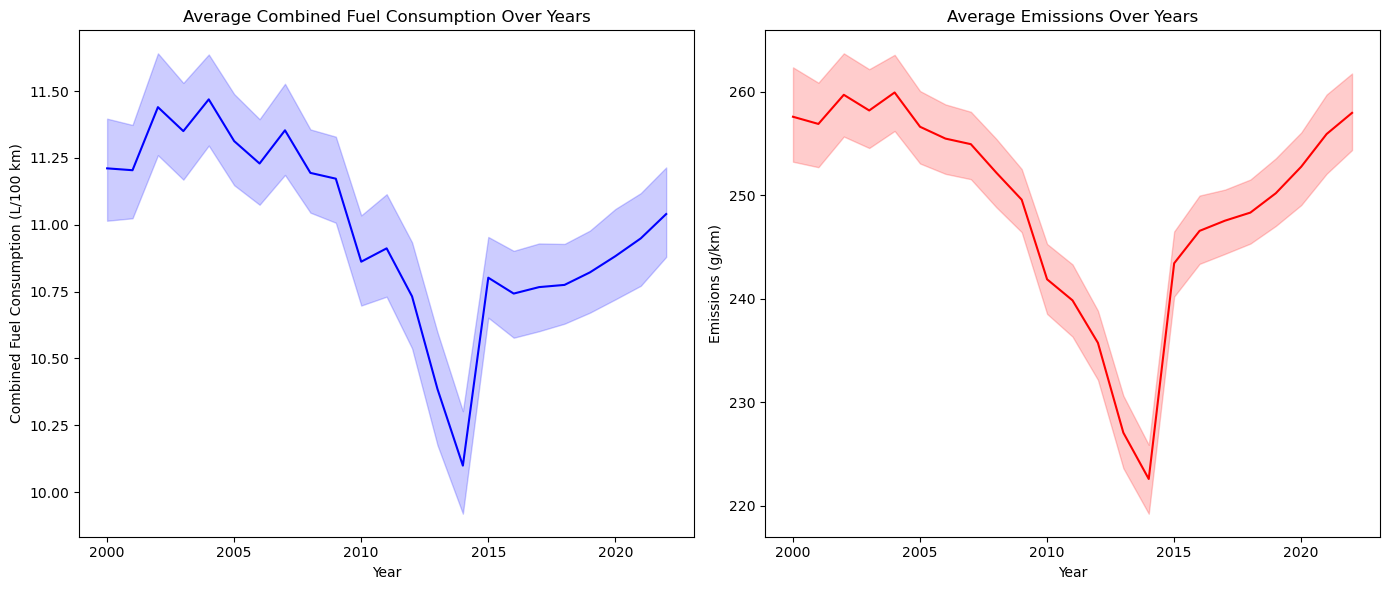

In [46]:
plt.figure(figsize=(14, 6))

# Average fuel consumption over years
plt.subplot(1, 2, 1)
sns.lineplot(data=vehicles_df1, x='YEAR', y='COMB (L/100 km)', estimator='mean', color='b')
plt.title('Average Combined Fuel Consumption Over Years')
plt.xlabel('Year')
plt.ylabel('Combined Fuel Consumption (L/100 km)')

# Average emissions over years
plt.subplot(1, 2, 2)
sns.lineplot(data=vehicles_df1, x='YEAR', y='EMISSIONS', estimator='mean', color='r')
plt.title('Average Emissions Over Years')
plt.xlabel('Year')
plt.ylabel('Emissions (g/km)')

plt.tight_layout()
plt.show()

This heatmap shows which models are more common for each make, helping to identify popular choices that might be preferred by customers or more readily available in the market.
Popular Models: The Audi A4 QUATTRO, Volkswagen Jetta, Toyota Camry, and Toyota Corolla are among the most frequently occurring models in this subset, suggesting they may be popular choices

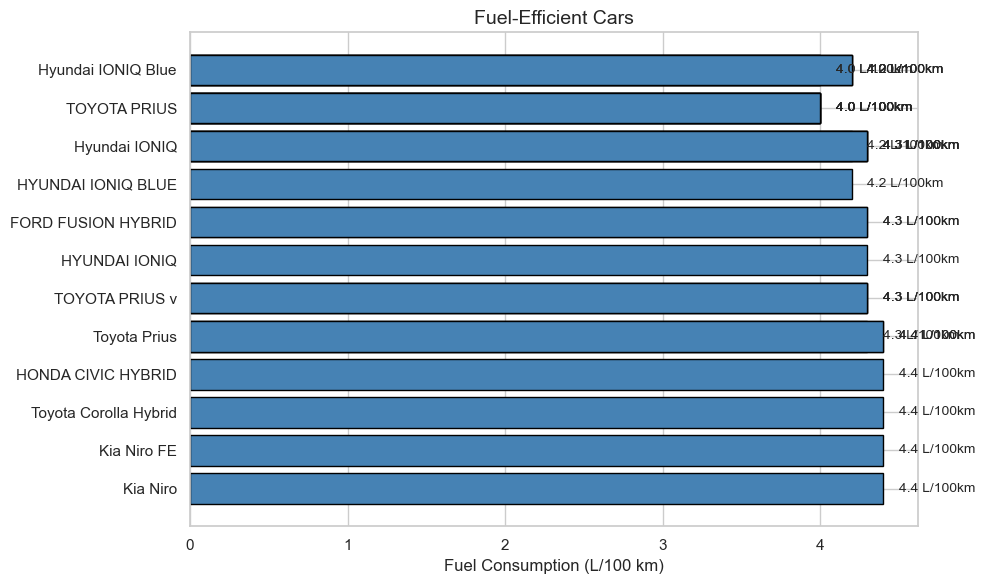

In [57]:
# Top 10 Most Fuel-Efficient Models

# Sort by fuel consumption and select the top 10 most fuel-efficient cars
top_fuel_efficient = vehicles_df1[['MAKE', 'MODEL', 'FUEL CONSUMPTION']].sort_values(by='FUEL CONSUMPTION').head(30)

# Combine 'MAKE' and 'MODEL' columns for concise labels
top_fuel_efficient['Car'] = top_fuel_efficient['MAKE'] + " " + top_fuel_efficient['MODEL']

# Set up the plot
plt.figure(figsize=(10, 6))
bars = plt.barh(top_fuel_efficient['Car'], top_fuel_efficient['FUEL CONSUMPTION'], color='steelblue', edgecolor='black')

# Add data labels to each bar
for bar in bars:
    plt.text(
        bar.get_width() + 0.1, 
        bar.get_y() + bar.get_height() / 2, 
        f'{bar.get_width():.1f} L/100km', 
        va='center', 
        ha='left', 
        fontsize=10
    )

# Customizations for clarity
plt.xlabel('Fuel Consumption (L/100 km)', fontsize=12)
plt.title('Fuel-Efficient Cars', fontsize=14)
plt.gca().invert_yaxis()  # Show the most fuel-efficient cars at the top
plt.tight_layout()
plt.show()


# Modelling and Evaluation

### Hypothesis
#### Null Hypothesis (H₀): There is no relationship between combined fuel consumption (COMB L/100 km) and emissions. 
#### Alternative Hypothesis (H1):There is no relationship between combined fuel consumption (COMB L/100 km) and emissions. 

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Define the independent variable (X) and dependent variable (y)
X = vehicles_df[['COMB (L/100 km)']]  # Independent variable
y = vehicles_df['EMISSIONS']          # Dependent variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"R-squared (R2): {r2}")
print("Coefficient for COMB (L/100 km):", model.coef_[0])


R-squared (R2): 0.8519198522589139
Coefficient for COMB (L/100 km): 18.834910772997976



The R-squared value, or the coefficient of determination, indicates how well the model explains the variance in the dependent variable (emissions).
An R-squared of 0.852 means that approximately 85.2% of the variation in emissions is explained by combined fuel consumption (COMB (L/100 km)). This is a high R-squared, suggesting that fuel consumption is a strong predictor of emissions in your datase

The coefficient represents the average change in emissions for each one-unit increase in combined fuel consumption.
In this case, for every additional unit of combined fuel consumption (L/100 km), emissions increase by approximately 18.83 units. This positive coefficient supports the hypothesis that higher fuel consumption is associated with higher emissions